In [138]:
import pandas as pd
import numpy as np
import statsmodels as sm
import seaborn as sns
import scipy as sc
import datetime as dt
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

import warnings
warnings.filterwarnings("ignore")

Data Origin:

https://ims.gov.il/he/node/272

In [249]:
file_path = "data/global_rad_technion_2017_2023.csv"
data = pd.read_csv(file_path,parse_dates=['date'])
data['avg_daily_radiation'] = data.mean(axis='columns',numeric_only=True)
data['date_column'] = pd.to_datetime(data['date'],format='mixed',dayfirst=True) 
data['date_string'] = data['date_column'].dt.strftime('%d-%m-%Y')
data[['day','month','year']] = data['date_string'].str.split('-', expand=True)
qmap = {1:'Q1', 2:'Q2', 3:'Q3', 4:'Q4'}
data['quarter'] = data['date_column'].dt.quarter.map(qmap)
data.head()

,date,radiation type,"קרינה שעתית 05-06 (וואט/מ""ר)","קרינה שעתית 06-07 (וואט/מ""ר)","קרינה שעתית 07-08 (וואט/מ""ר)","קרינה שעתית 08-09 (וואט/מ""ר)","קרינה שעתית 09-10 (וואט/מ""ר)","קרינה שעתית 10-11 (וואט/מ""ר)","קרינה שעתית 11-12 (וואט/מ""ר)","קרינה שעתית 12-13 (וואט/מ""ר)",...,"קרינה שעתית 16-17 (וואט/מ""ר)","קרינה שעתית 17-18 (וואט/מ""ר)","קרינה שעתית 18-19 (וואט/מ""ר)",avg_daily_radiation,date_column,date_string,day,month,year,quarter
0,01/01/2017,גלובלית,0.0,3.0,56.0,245.0,406.0,510.0,583.0,587.0,...,15.0,0.0,0,204.000000,2017-01-01,01-01-2017,01,01,2017,Q1
1,02/01/2017,גלובלית,0.0,4.0,48.0,250.0,394.0,437.0,355.0,143.0,...,10.0,0.0,0,141.642857,2017-01-02,02-01-2017,02,01,2017,Q1
2,03/01/2017,גלובלית,0.0,4.0,36.0,189.0,411.0,486.0,540.0,470.0,...,13.0,0.0,0,220.428571,2017-01-03,03-01-2017,03,01,2017,Q1
3,04/01/2017,גלובלית,0.0,2.0,21.0,33.0,78.0,258.0,639.0,560.0,...,15.0,0.0,0,167.928571,2017-01-04,04-01-2017,04,01,2017,Q1
4,05/01/2017,גלובלית,0.0,4.0,62.0,225.0,388.0,457.0,477.0,353.0,...,17.0,0.0,0,193.928571,2017-01-05,05-01-2017,05,01,2017,Q1


In [250]:
mini_data = data[['date_column','avg_daily_radiation','year','month','day','quarter']].set_index('date_column')
mini_data.head()

,avg_daily_radiation,year,month,day,quarter
date_column,,,,,
2017-01-01,204.000000,2017,01,01,Q1
2017-01-02,141.642857,2017,01,02,Q1
2017-01-03,220.428571,2017,01,03,Q1
2017-01-04,167.928571,2017,01,04,Q1
2017-01-05,193.928571,2017,01,05,Q1


#### Seasonal Decomposition

In [318]:
df = mini_data
palette = {'darknavy':'#001253','mid_blue':'#3E6D9C','mid_orange':'#FD841F','dark_orange':'#E14D2A','light_blue':'#D7EAEA'}
palette2 = {'green_teel':'#24A19C','lilach':"#9D65C9",'peach':'#FE7E6D','banana':"#FFB961"}
order = sorted(df['quarter'].unique())

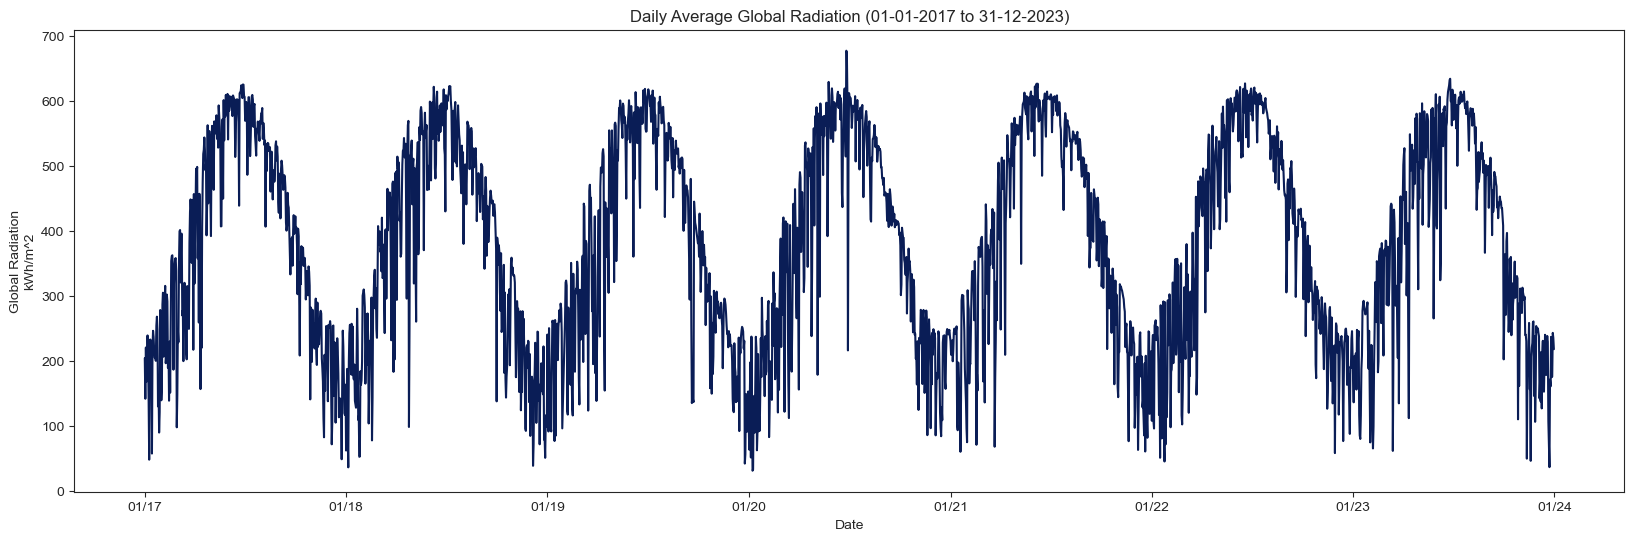

In [431]:
import matplotlib.dates as mdates

plt.figure(figsize=(20, 6))
plt.plot(df.index, df['avg_daily_radiation'], color='#0A1D56')
plt.title('Daily Average Global Radiation (01-01-2017 to 31-12-2023)')
plt.xlabel('Date')
plt.ylabel('Global Radiation\nkWh/m^2')

plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%y'))
plt.show()

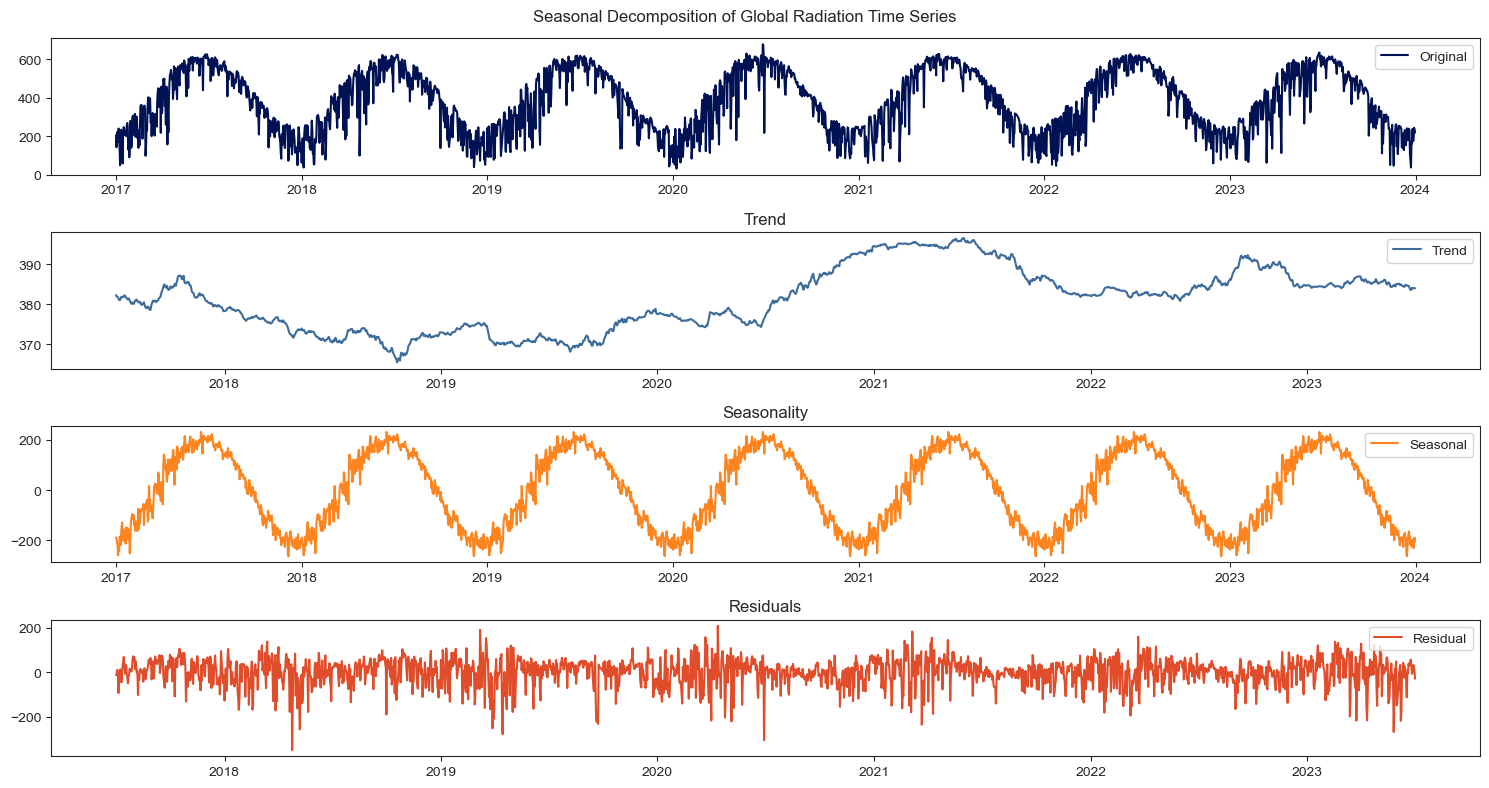

In [436]:
decomposition = seasonal_decompose(df['avg_daily_radiation'], period=365)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid



plt.figure(figsize=(15, 8))
plt.suptitle('Seasonal Decomposition of Global Radiation Time Series')
plt.subplot(411)

plt.plot(df.index, df['avg_daily_radiation'], label='Original', color='#001253') #darknavy
plt.legend(loc='best')
plt.subplot(412)
plt.title('Trend')
plt.plot(df.index, trend, label='Trend', color='#3E6D9C') #mid_blue
plt.legend(loc='best')
plt.subplot(413)
plt.title('Seasonality')
plt.plot(df.index, seasonal, label='Seasonal', color='#FD841F') #mid_orange
plt.legend(loc='upper right')
plt.subplot(414)
plt.title("Residuals")
plt.plot(df.index, residual, label='Residual', color='#E14D2A') #dark_orange
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

<Figure size 2000x1000 with 0 Axes>

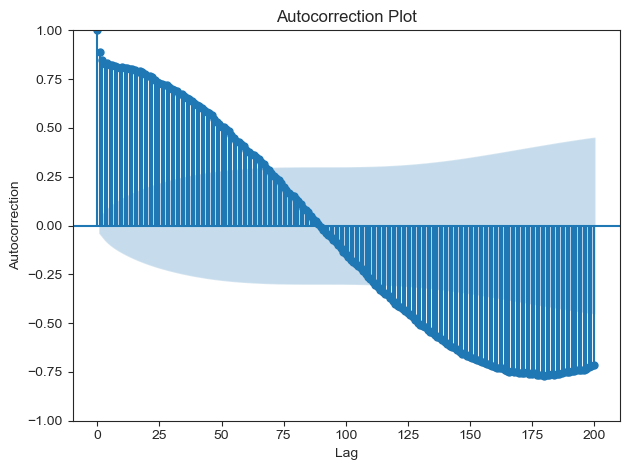

In [447]:
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(20, 10))
plot_acf(df['avg_daily_radiation'], lags=200)
plt.title('Autocorrection Plot')
plt.xlabel('Lag')
plt.ylabel('Autocorrection')
plt.tight_layout()
plt.show()

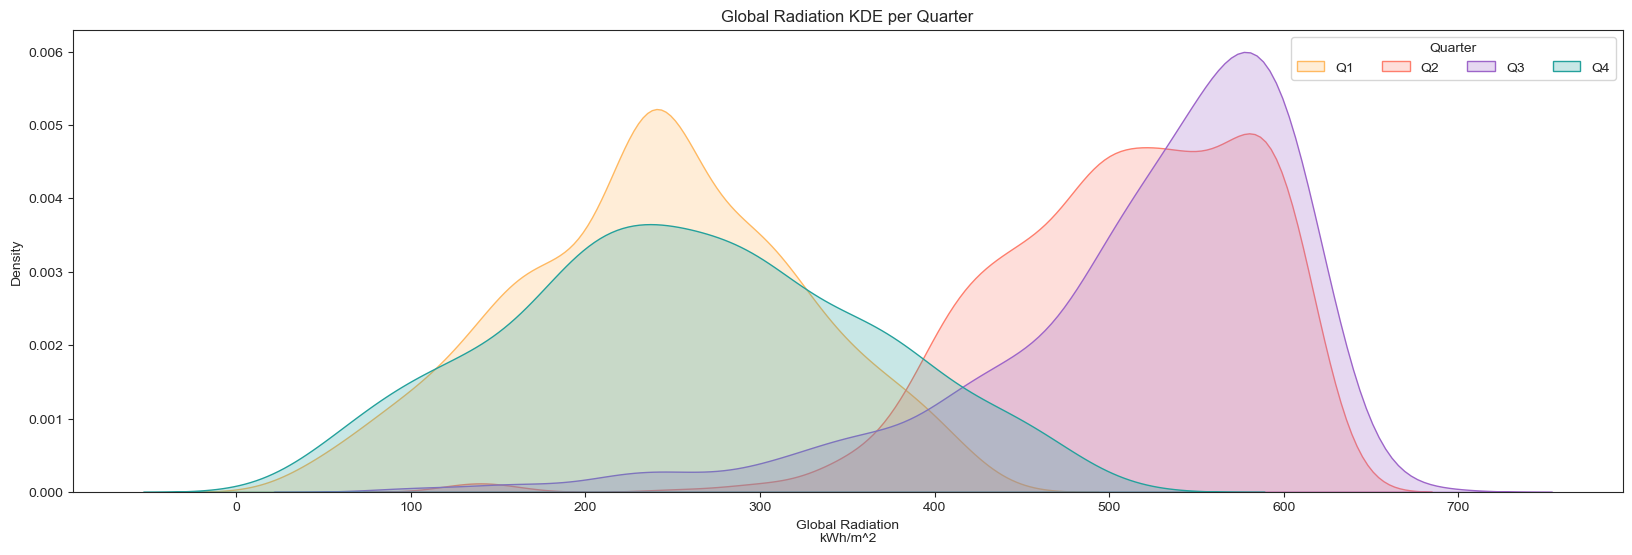

In [427]:
plt.figure(figsize=(20,6))

sns.kdeplot(x='avg_daily_radiation',data=df, hue='quarter', shade=True, palette=list(palette2.values()),common_norm=False,hue_order=order,legend=True, )
plt.legend(title='Quarter',loc='upper right', ncol=4,labels=['Q1', 'Q2', 'Q3', 'Q4'])
plt.xlabel('Global Radiation\nkWh/m^2')
plt.title("Global Radiation KDE per Quarter")
plt.show()

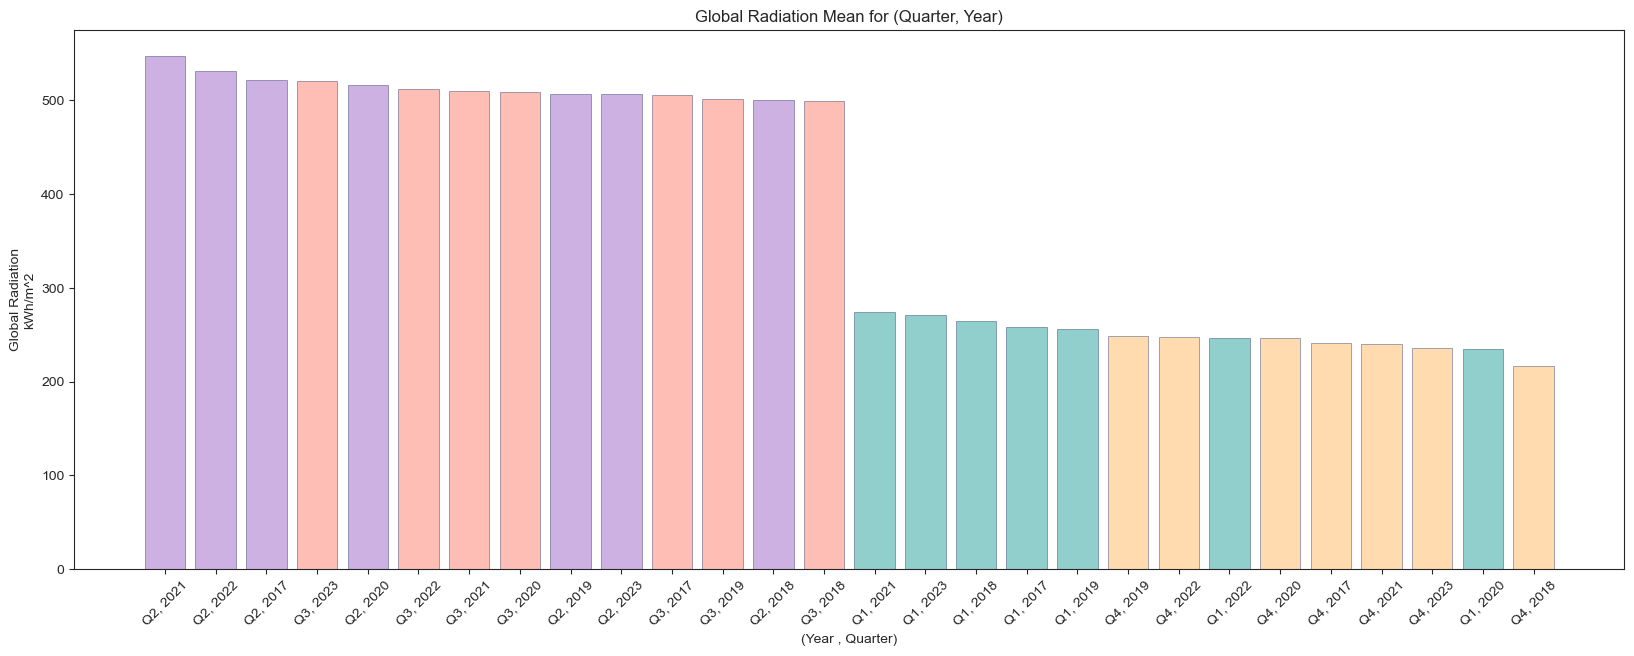

In [419]:
bar_data = df.groupby(['year','quarter']).avg_daily_radiation.mean().sort_values(ascending=False)

colors = []
for _, quarter in bar_data.index:
    if quarter == 'Q1':
        colors.append(palette2['green_teel'])
    elif quarter == 'Q2':
        colors.append(palette2['lilach'])  
    elif quarter == 'Q3':
        colors.append(palette2['peach']) 
    elif quarter == 'Q4':
        colors.append(palette2['banana'])  
        
plt.figure(figsize=(20,7))
x_values = [f"{quarter}, {year}" for year, quarter in bar_data.index]
#plt.barh(y=x_values, width=bar_data,color=colors,alpha=.5,edgecolor=palette['darknavy'],linewidth=0.5,left=100)
plt.bar(x=x_values, height=bar_data,color=colors,alpha=.5,edgecolor=palette['darknavy'],linewidth=0.5)
plt.xticks(rotation=45)

plt.ylabel('Global Radiation\nkWh/m^2')
plt.xlabel(f"(Year , Quarter)")
plt.title('Global Radiation Mean for (Quarter, Year)')

plt.show()

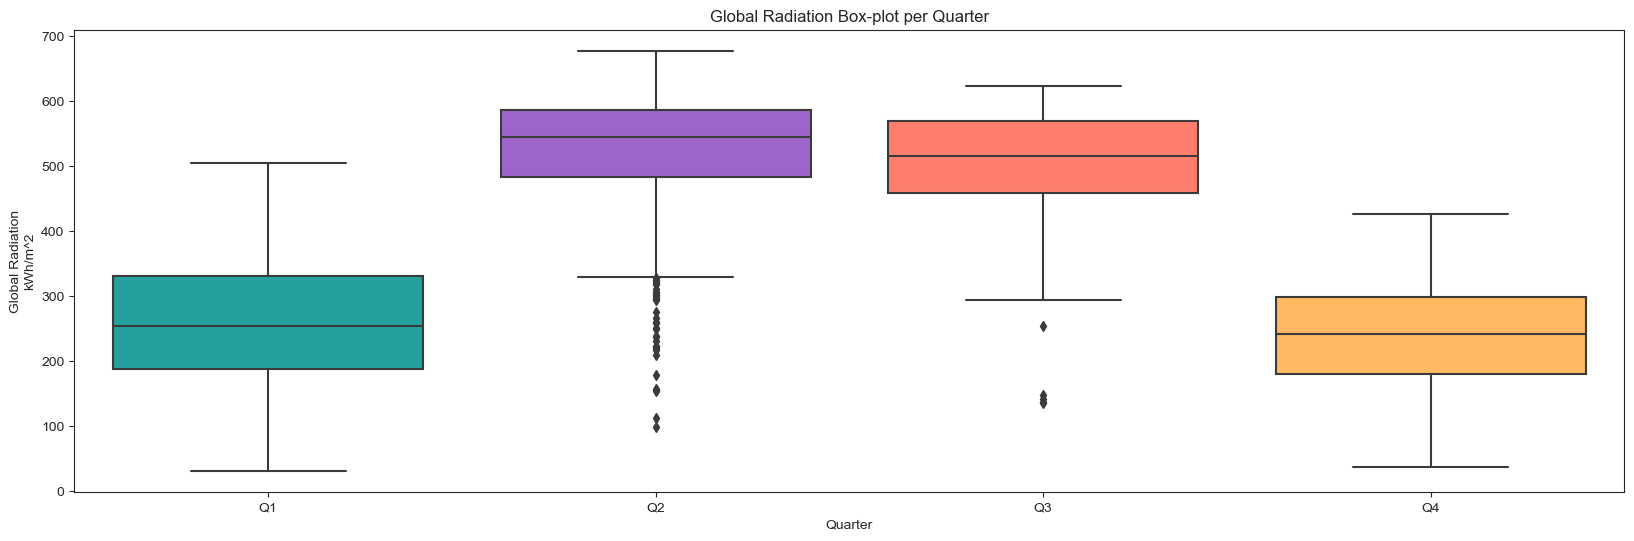

In [429]:
plt.figure(figsize=(20, 6))
sns.boxplot(data=df, y='avg_daily_radiation', x='quarter', palette=palette2.values(), saturation=1)
plt.ylabel('Global Radiation\nkWh/m^2')
plt.xlabel('Quarter')
plt.title("Global Radiation Box-plot per Quarter")
plt.show()